In [1]:
library("dplyr")
library("ggplot2")
library("geosphere")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data1 <- read.csv("Data_CitiBike/JC-201902-citibike-tripdata.csv")
data2 <- read.csv("Data_CitiBike/JC-201903-citibike-tripdata.csv")
data3 <- read.csv("Data_CitiBike/JC-201904-citibike-tripdata.csv")
data4 <- read.csv("Data_CitiBike/JC-201905-citibike-tripdata.csv")
data5 <- read.csv("Data_CitiBike/JC-201906-citibike-tripdata.csv")

In [3]:
data <- rbind(data1, data2, data3, data4, data5)

In [4]:
sum_missing_values <- sum(is.na(data))
sum_missing_values

[1] 0

In [5]:
average_trip_duration <- mean(data$tripduration)/60
average_trip_duration

median_trip_duration <- median(data$tripduration)/60
median_trip_duration

[1] 12.81071

[1] 5.683333

In [6]:
min_duration <- min(data$tripduration)/60
max_duration <- max(data$tripduration)/60

min_duration
max_duration

[1] 1.016667

[1] 28817

In [7]:
mean_less_than_three <- mean(data$tripduration[data$tripduration <= 3*60*60])/60
median_less_than_three <- median(data$tripduration[data$tripduration <= 3*60*60])/60

mean_less_than_three
median_less_than_three

n_skimmed_entries <- length(data$tripduration) - length(data$tripduration[data$tripduration <= 3*60*60])
n_skimmed_entries

[1] 9.223037

[1] 5.666667

[1] 427

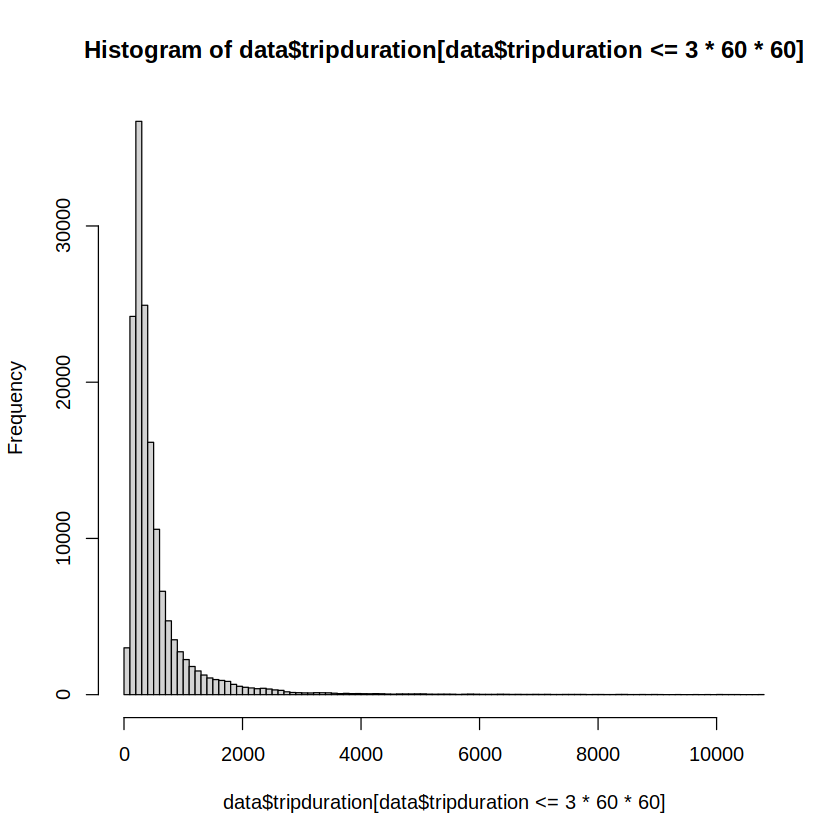

In [8]:
hist(data$tripduration[data$tripduration <= 3*60*60], breaks=100)

In [9]:
data$months <- format(as.Date(data$starttime), "%m")
mean_per_month <- data %>% group_by(months) %>% summarise(mean_tripduration = mean(tripduration/60))
mean_per_month

months,mean_tripduration
<chr>,<dbl>
02,10.088993
03,9.102939
04,11.899928
05,13.735333
06,16.228166


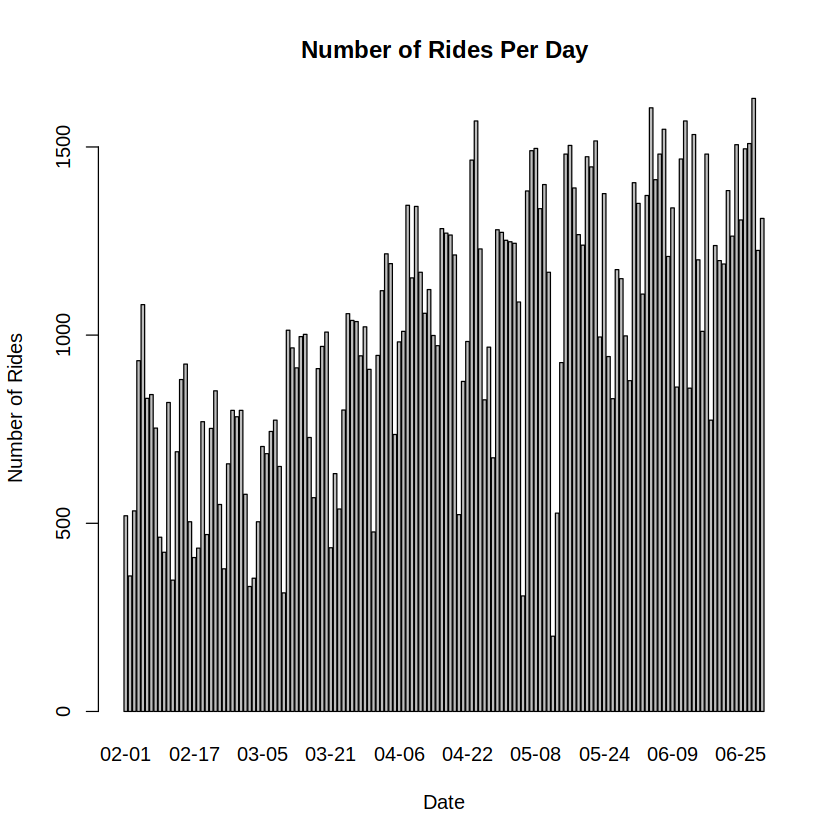

In [10]:
data$days <- format(as.Date(data$starttime), "%m-%d")
rides_per_day <- data %>% group_by(days) %>% summarise(number_of_rides = n())
barplot(rides_per_day$number_of_rides,
        names.arg = rides_per_day$days,
        main = "Number of Rides Per Day",
        xlab = "Date",
        ylab = "Number of Rides")

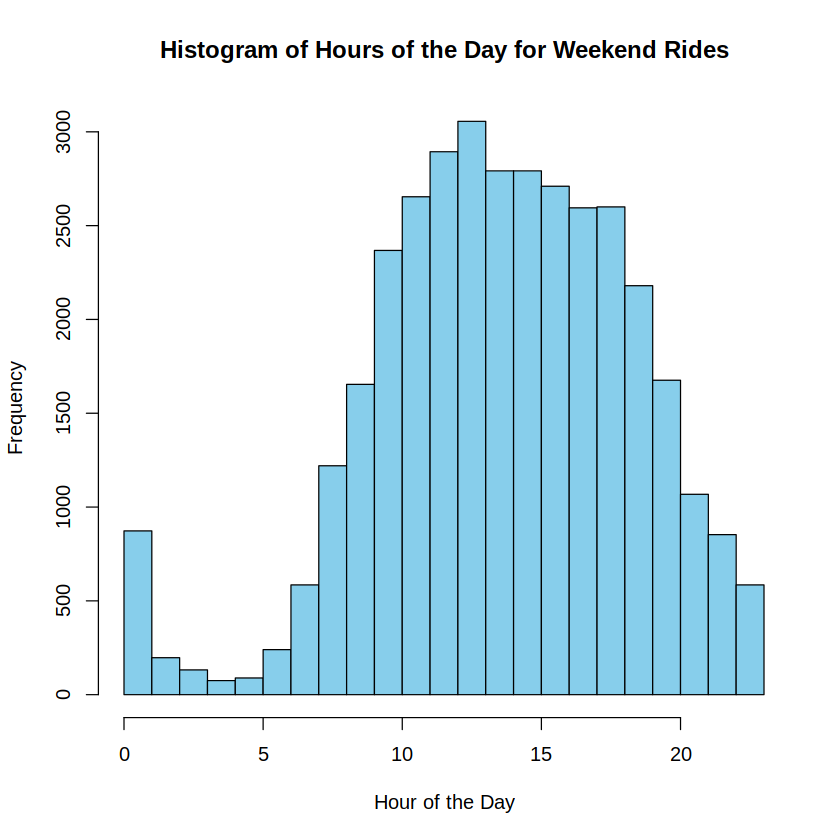

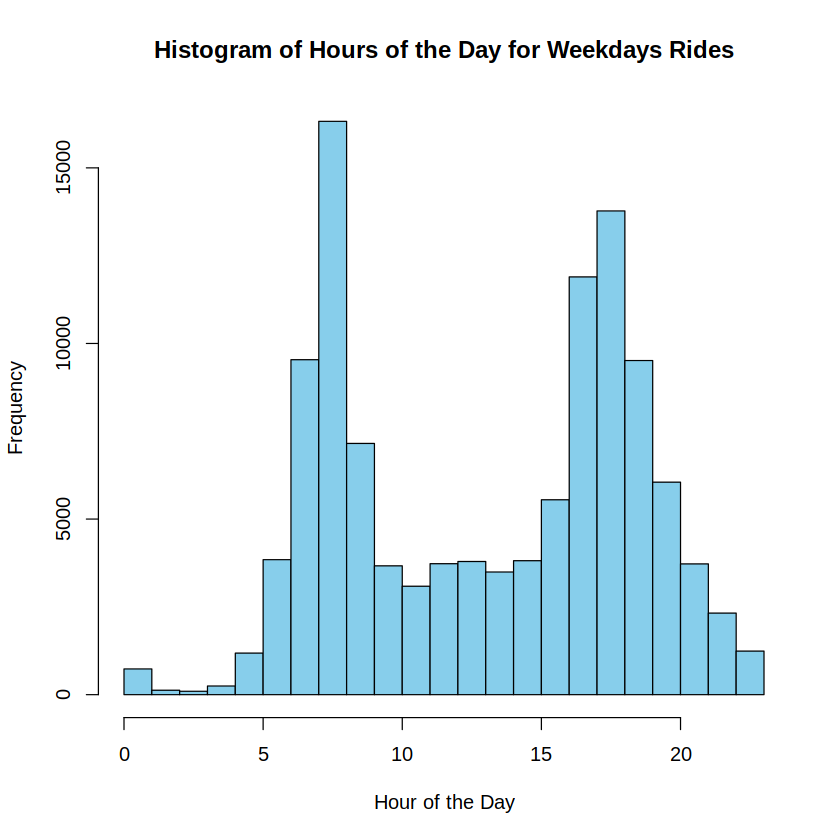

In [11]:
data$weekdays <- weekdays(as.Date(data$starttime))
data$weekend <- data$weekdays %in% c("Saturday", "Sunday")
weekend_rides <- as.numeric(format(as.POSIXct(data$starttime[data$weekend == TRUE]), "%H"))
hist(weekend_rides, 
     main = "Histogram of Hours of the Day for Weekend Rides",
     xlab = "Hour of the Day",
     ylab = "Frequency",
     breaks = seq(0, 23, by = 1),
     col = "skyblue")

weekdays_rides <- as.numeric(format(as.POSIXct(data$starttime[data$weekend == FALSE]), "%H"))
hist(weekdays_rides, 
     main = "Histogram of Hours of the Day for Weekdays Rides",
     xlab = "Hour of the Day",
     ylab = "Frequency",
     breaks = seq(0, 23, by = 1),
     col = "skyblue")

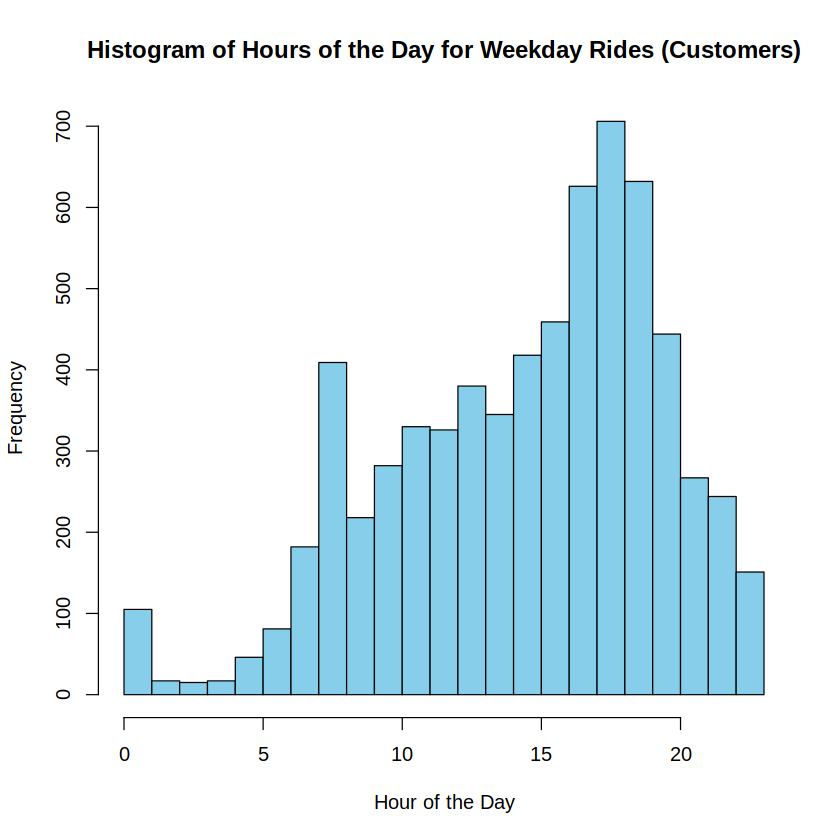

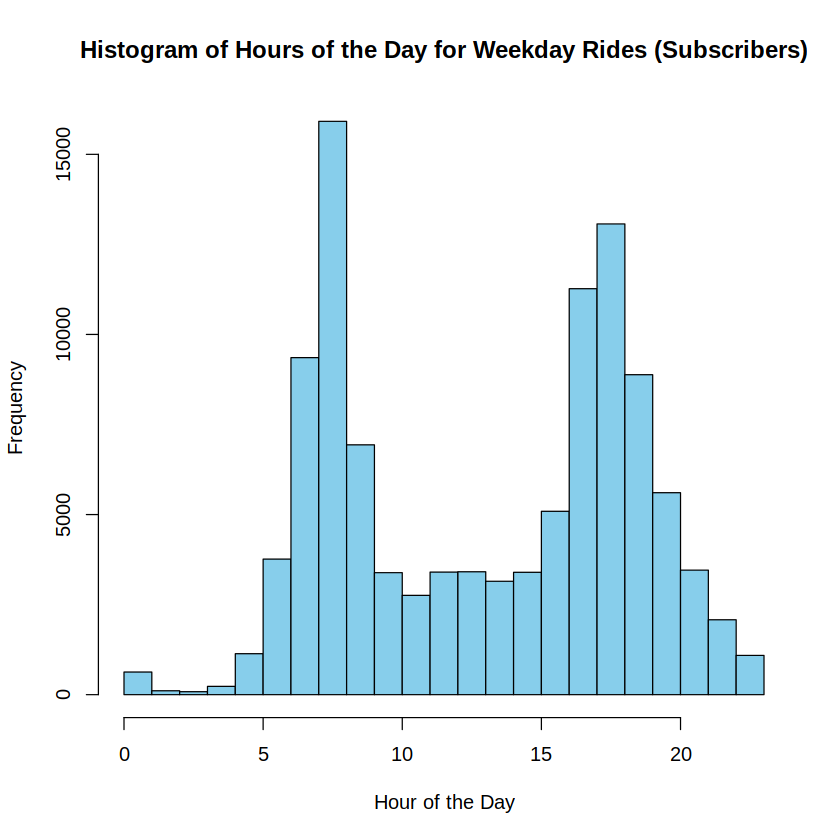

In [12]:
# Convert starttime to POSIXct format
data$starttime <- as.POSIXct(data$starttime)

customers_weekdays_rides <- data[data$usertype == "Customer" & data$weekend == FALSE, ]
subscribers_weekdays_rides <- data[data$usertype == "Subscriber" & data$weekend == FALSE, ]

weekdays_rides_c <- as.numeric(format(customers_weekdays_rides$starttime, "%H"))
weekdays_rides_s <- as.numeric(format(subscribers_weekdays_rides$starttime, "%H"))

# Create a histogram of the hours of the day for weekday rides taken by subscribers
hist(weekdays_rides_c, 
     main = "Histogram of Hours of the Day for Weekday Rides (Customers)",
     xlab = "Hour of the Day",
     ylab = "Frequency",
     breaks = seq(0, 23, by = 1),
     col = "skyblue")

hist(weekdays_rides_s, 
     main = "Histogram of Hours of the Day for Weekday Rides (Subscribers)",
     xlab = "Hour of the Day",
     ylab = "Frequency",
     breaks = seq(0, 23, by = 1),
     col = "skyblue")

In [13]:
data_less_than_one_hour <- data[data$tripduration < 60*60, ]
start_coords <- cbind(data_less_than_one_hour$start.station.longitude, data_less_than_one_hour$start.station.latitude)
end_coords <- cbind(data_less_than_one_hour$end.station.longitude, data_less_than_one_hour$end.station.latitude)

data_less_than_one_hour$speeds <- distHaversine(start_coords, end_coords)/data_less_than_one_hour$tripduration * 3.6

mean(data_less_than_one_hour$speeds)

[1] 9.240097

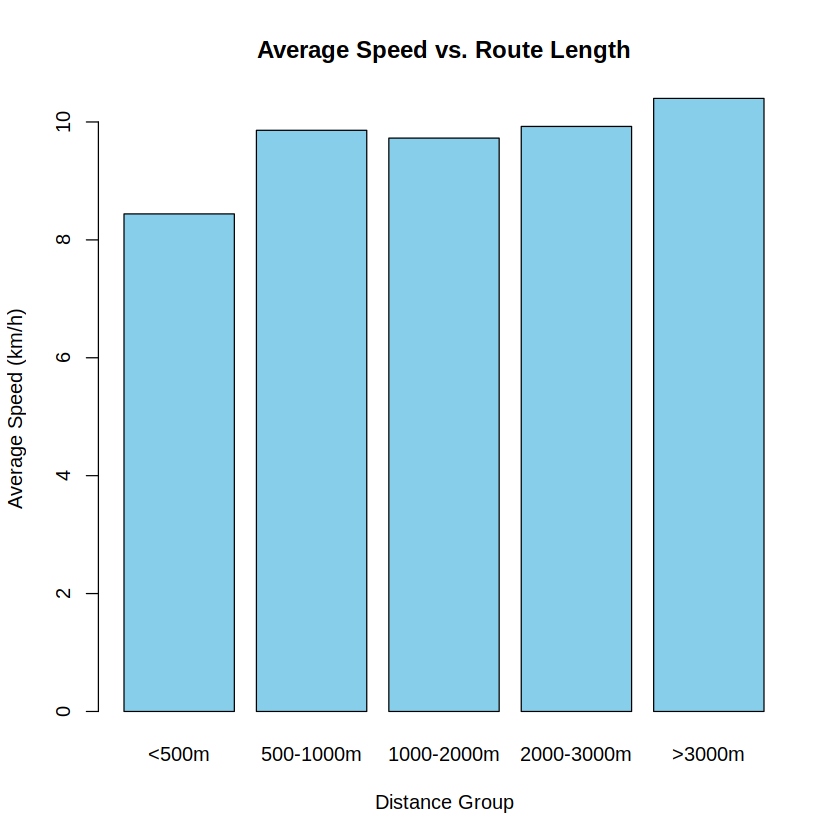

In [14]:
distance_groups <- cut(distHaversine(start_coords, end_coords), breaks = c(0, 500, 1000, 2000, 3000, Inf), labels = c("<500m", "500-1000m", "1000-2000m", "2000-3000m", ">3000m"))

mean_speeds <- tapply(data_less_than_one_hour$speeds, distance_groups, mean)
barplot(mean_speeds, xlab = "Distance Group", ylab = "Average Speed (km/h)", main = "Average Speed vs. Route Length", col = "skyblue")

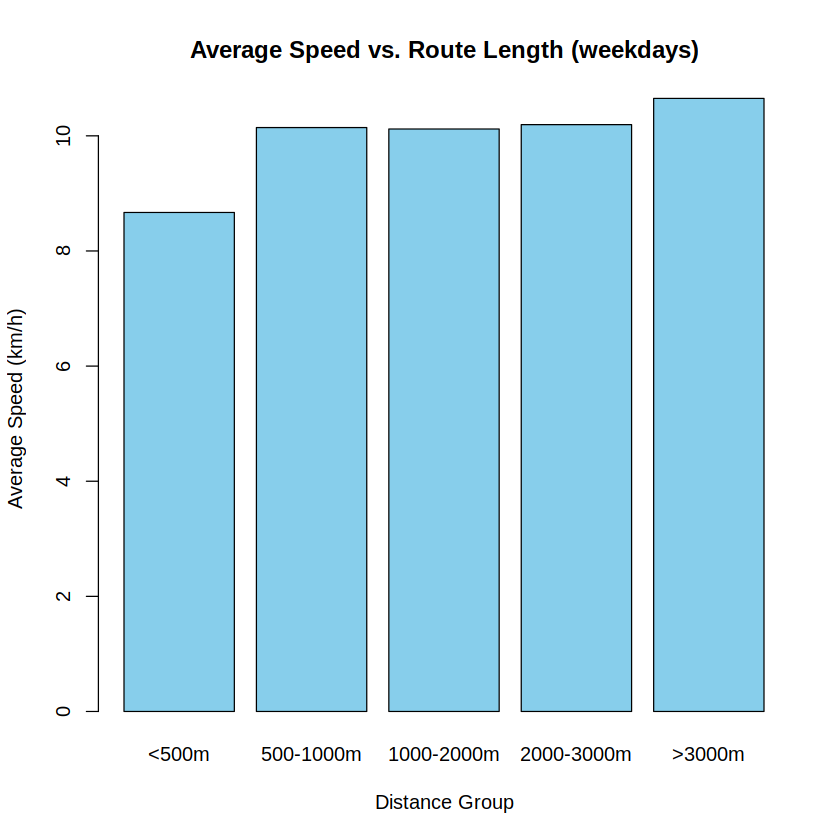

In [15]:
data_less_than_one_hour_weekdays <- data[data$tripduration < 60*60 & data$weekend == FALSE, ]
start_coords_weekdays <- cbind(data_less_than_one_hour_weekdays$start.station.longitude, data_less_than_one_hour_weekdays$start.station.latitude)
end_coords_weekdays <- cbind(data_less_than_one_hour_weekdays$end.station.longitude, data_less_than_one_hour_weekdays$end.station.latitude)

data_less_than_one_hour_weekdays$speeds <- distHaversine(start_coords_weekdays, end_coords_weekdays)/data_less_than_one_hour_weekdays$tripduration * 3.6

distance_groups_weekdays <- cut(distHaversine(start_coords_weekdays, end_coords_weekdays), breaks = c(0, 500, 1000, 2000, 3000, Inf), labels = c("<500m", "500-1000m", "1000-2000m", "2000-3000m", ">3000m"))
mean_speeds_weekdays <- tapply(data_less_than_one_hour_weekdays$speeds, distance_groups_weekdays, mean)
barplot(mean_speeds_weekdays, xlab = "Distance Group", ylab = "Average Speed (km/h)", main = "Average Speed vs. Route Length (weekdays)", col = "skyblue")

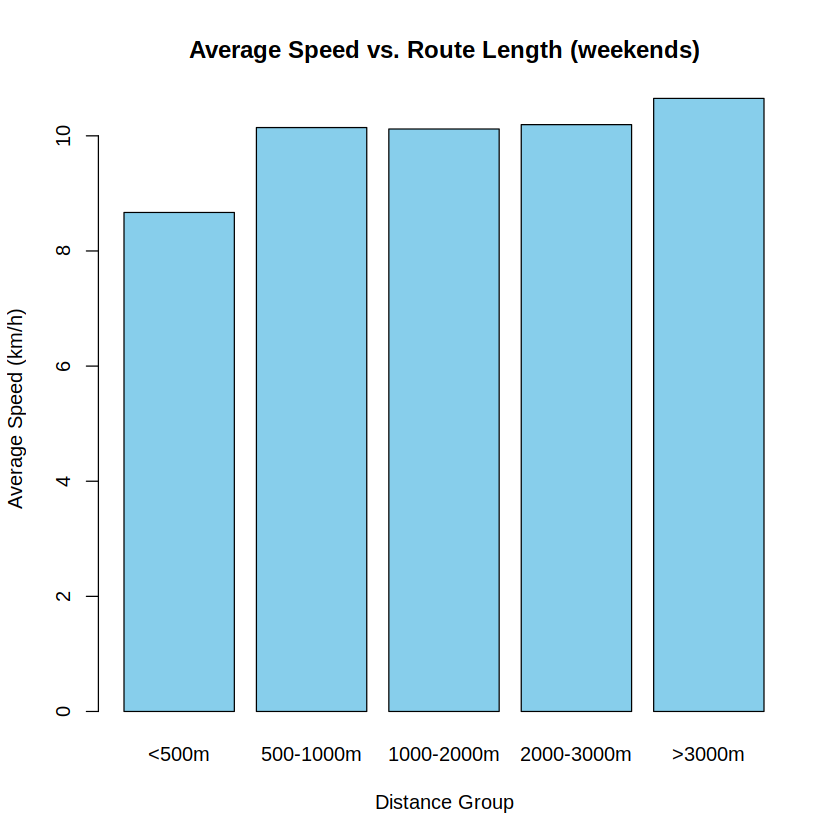

In [16]:
data_less_than_one_hour_weekends <- data[data$tripduration < 60*60 & data$weekend == FALSE, ]
start_coords_weekends <- cbind(data_less_than_one_hour_weekends$start.station.longitude, data_less_than_one_hour_weekends$start.station.latitude)
end_coords_weekends <- cbind(data_less_than_one_hour_weekends$end.station.longitude, data_less_than_one_hour_weekends$end.station.latitude)

data_less_than_one_hour_weekends$speeds <- distHaversine(start_coords_weekends, end_coords_weekends)/data_less_than_one_hour_weekends$tripduration * 3.6

distance_groups_weekends <- cut(distHaversine(start_coords_weekends, end_coords_weekends), breaks = c(0, 500, 1000, 2000, 3000, Inf), labels = c("<500m", "500-1000m", "1000-2000m", "2000-3000m", ">3000m"))
mean_speeds_weekends <- tapply(data_less_than_one_hour_weekends$speeds, distance_groups_weekends, mean)
barplot(mean_speeds_weekends, xlab = "Distance Group", ylab = "Average Speed (km/h)", main = "Average Speed vs. Route Length (weekends)", col = "skyblue")

In [17]:
start_station_values <- data %>% group_by(start.station.name) %>% summarise(start_station_name = n())
most_common_start_station <- start_station_values[start_station_values$start_station_name == max(start_station_values$start_station_name), ]
most_common_start_station

end_station_values <- data %>% group_by(end.station.name) %>% summarise(end_station_name = n())
least_common_end_station <- end_station_values[end_station_values$end_station_name == min(end_station_values$end_station_name), ]
least_common_end_station

start.station.name,start_station_name
<chr>,<int>
Grove St PATH,17902


end.station.name,end_station_name
<chr>,<int>
1 Ave & E 16 St,1
8 Ave & W 52 St,1
Broadway & W 56 St,1
E 33 St & 5 Ave,1
Norfolk St & Broome St,1
South St & Gouverneur Ln,1
Spruce St & Nassau St,1
W 15 St & 10 Ave,1
W 15 St & 6 Ave,1


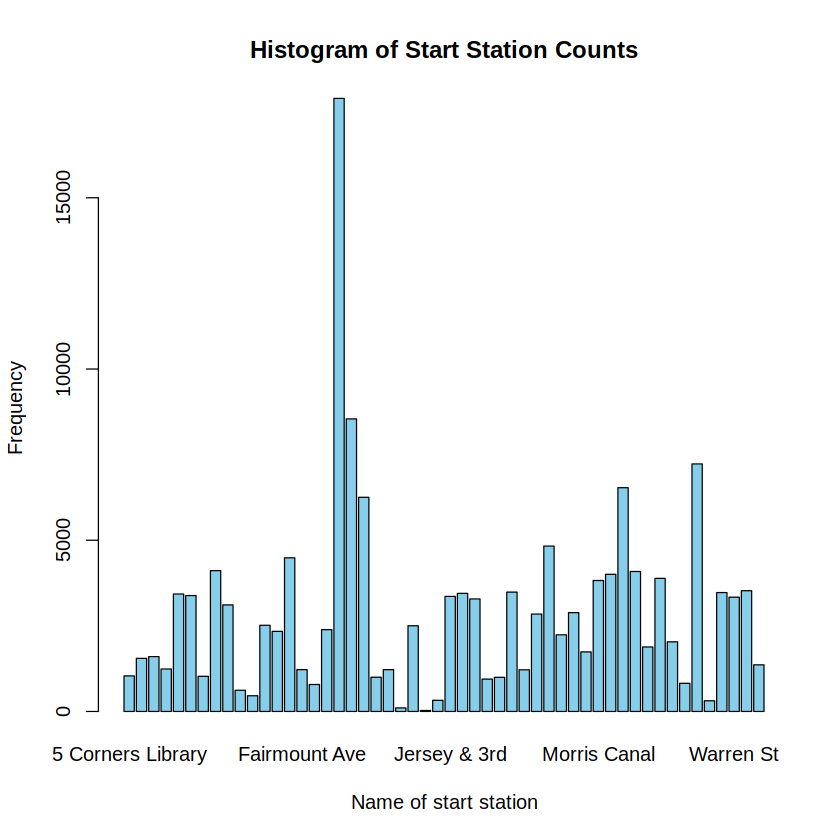

In [18]:
barplot(start_station_values$start_station_name,
        names.arg = start_station_values$start.station.name,
        main = "Histogram of Start Station Counts",
        xlab = "Name of start station",
        ylab = "Frequency",
        col = "skyblue")

In [41]:
most_common_routes <- data %>%
  group_by(start.station.name, end.station.name) %>%
  summarise(route_count = n()) %>%
  arrange(desc(route_count))
head(most_common_routes, 3)

least_common_routes <- data %>%
  group_by(start.station.name, end.station.name) %>%
  summarise(route_count = n()) %>%
  arrange(route_count)
head(least_common_routes, 3)

`summarise()` has grouped output by 'start.station.name'. You can override
using the `.groups` argument.


start.station.name,end.station.name,route_count
<chr>,<chr>,<int>
Hamilton Park,Grove St PATH,3037
Grove St PATH,Hamilton Park,2318
Brunswick & 6th,Grove St PATH,1916


`summarise()` has grouped output by 'start.station.name'. You can override
using the `.groups` argument.


start.station.name,end.station.name,route_count
<chr>,<chr>,<int>
5 Corners Library,Dixon Mills,1
5 Corners Library,Grand St,1
Astor Place,Brunswick & 6th,1
